In [6]:
import pandas as pd
from datetime import datetime
import numpy as np
import trompy as tp

%run ..//source//FED_functions.py

File is excel file. Making csv metafile first
File is excel file. Making csv metafile first
File is excel file. Making csv metafile first


In [7]:
def get_breakpoints(filename, max_hours=None):

    if max_hours:
        df = get_timerange_from_FEDfile(filename)
    else:
        df = pd.read_csv(filename)

    # works by finding the difference whenever the FR resets
    FR = df["FR"]
    breakpoints = [np.abs(val) for idx, val in enumerate(np.diff(FR)) if val < 0]

    return breakpoints

def get_max_pellets(filename, max_hours=None):
    
    if max_hours:
        df = get_timerange_from_FEDfile(filename)
    else:
        df = pd.read_csv(filename)
    
    max_pellets = df["Pellet_Count"].max()

    return max_pellets

def get_timerange_from_FEDfile(filename):

    # formats = ['%Y-%m-%d %H:%M:%S', '%m/%d/%Y %H:%M:%S']

    df = pd.read_csv(filename)

    # try:
    #     tmp_date_time_obj = datetime.strptime(rows[0][0], formats[0])
    #     date_format = formats[0]
    # except ValueError:
    #     tmp_date_time_obj = datetime.strptime(rows[0][0], formats[1])
    #     date_format = formats[1]

    date_format = '%m/%d/%Y %H:%M:%S'
    t0 = datetime.strptime(df["MM:DD:YYYY hh:mm:ss"][0], date_format)

    print(t0)
    
    return t0


filename = "..\\data\\FED001_051522_00.CSV"
df = pd.read_csv(filename)
df.columns
# bps = get_breakpoints(filename)
# # t0 = get_timerange_from_FEDfile(filename)

Index(['MM:DD:YYYY hh:mm:ss', 'Library_Version', 'Session_type',
       'Device_Number', 'Battery_Voltage', 'Motor_Turns', 'FR', 'Event',
       'Active_Poke', 'Left_Poke_Count', 'Right_Poke_Count', 'Pellet_Count',
       'Block_Pellet_Count', 'Retrieval_Time', 'InterPelletInterval',
       'Poke_Time'],
      dtype='object')

In [8]:
# function to get timestamps from fed csv files
metafile = "..\\FEDXA DATA SHEETS METAFILE.xls"
rows, header = tp.metafilereader(metafile, sheetname="METAFILE")

max_hours = None

mice = {}
for row in rows:
    mouse_id = row[1]
    if mouse_id not in mice.keys():
        mice[mouse_id] = {}
        mice[mouse_id]["sex"] = row[4]
        mice[mouse_id]["order"] = row[5]

for key in mice.keys():
    for row in rows:
        if row[1] == key and row[3] == "ECO":
            filename = "..\\data\\{}".format(row[0])
            if row[2] == "RICH":
                mice[key]["rich_breakpoint"] = np.mean(get_breakpoints(filename, max_hours=max_hours))
                mice[key]["rich_max_pellets"] = get_max_pellets(filename, max_hours=max_hours)
            elif row[2] == "PR":
                mice[key]["pr_breakpoint"] = np.mean(get_breakpoints(filename, max_hours=max_hours))
                mice[key]["pr_max_pellets"] = get_max_pellets(filename, max_hours=max_hours)

            else:
                print(row[2], "is not a valid type of pellet for", key)


File is excel file. Making csv metafile first
..\data\FED002_051522_00.CSV
..\data\FED004_051522_00.CSV
..\data\FED006_051522_04.CSV
..\data\FED008_051522_00.CSV
..\data\FED010_051522_00.CSV
..\data\FED012_051522_00.CSV
..\data\FED002_051222_02.CSV
..\data\FED004_051222_02.CSV
..\data\FED006_051222_03.CSV
..\data\FED008_051222_02.CSV
..\data\FED010_051222_02.CSV
..\data\FED012_051222_02.CSV


In [9]:
mice_choice = mice

In [19]:
nr_selector = {"sex": "M", "order": 2}
pr_selector = {"sex": "M", "order": 1}

breakpoints_nr = get_data_fields(mice_choice, ['rich_breakpoint', 'pr_breakpoint'], nr_selector)
breakpoints_pr = get_data_fields(mice_choice, ['rich_breakpoint', 'pr_breakpoint'], pr_selector)

total_pellets_nr = get_data_fields(mice_choice, ['rich_max_pellets', 'pr_max_pellets'], nr_selector)
total_pellets_pr = get_data_fields(mice_choice, ['rich_max_pellets', 'pr_max_pellets'], pr_selector)


6 items in output dictionary
6 items in output dictionary
6 items in output dictionary
6 items in output dictionary


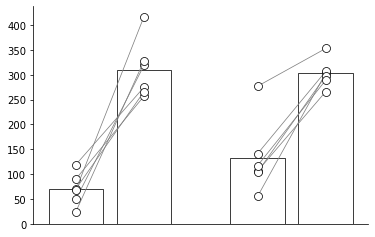

In [20]:
_ = tp.barscatter([total_pellets_nr, total_pellets_pr], paired=True)


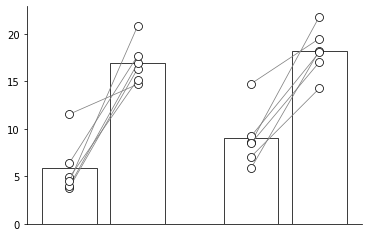

In [21]:
_ = tp.barscatter([breakpoints_nr, breakpoints_pr], paired=True)
